### Sequential Workflow

In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

load_dotenv()

True

In [2]:
model = ChatOpenAI()

In [25]:
class BlogState(TypedDict):
    
    title: str
    outline: str
    content: str
    score: int

In [4]:
def create_outline(state:BlogState) -> BlogState:
    
    title = state['title']
    
    prompt = f"Generate a detailed outline for a blog on the topic {title}"
    outline = model.invoke(prompt).content
    
    state['outline'] = outline
    
    return state

In [12]:
def create_blog(state:BlogState) -> BlogState:
    
    title = state['title']
    outline = state['outline']
    
    prompt = f"Generate a blog of 200 words from the title {title} and outline {outline}"
    content = model.invoke(prompt).content
    
    state['content'] = content
    
    return state

In [31]:
def evaluate_blog(state: BlogState) -> BlogState:
    
    content = state['content']
    
    prompt=f"Evaluate the blog based on the content {content} and generate and integer score"
    score = model.invoke(prompt).content
    
    state['score'] = score
    
    return state

In [32]:
graph = StateGraph(BlogState)

#add node
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('evaluate_blog',evaluate_blog)


#add edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','evaluate_blog')
graph.add_edge('evaluate_blog',END)


# compile the graph
workflow = graph.compile()

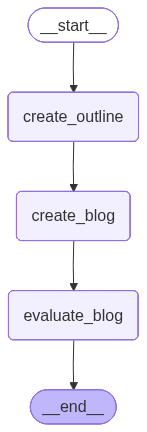

In [29]:
workflow

In [33]:
# execute the workflow

initial_state = {'title': "Advent of RAG"}
final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Advent of RAG', 'outline': 'I. Introduction\n  A. Explanation of what RAG is and its significance in the tech world\n  B. Brief overview of the origins of RAG and its evolution\n  \nII. The Advent of RAG\n  A. The rise of RAG in the tech industry\n  B. How RAG is changing the way developers approach software development\n  C. The benefits of using RAG in software development\n  \nIII. Understanding RAG\n  A. What RAG stands for and how it works\n  B. The key principles and concepts of RAG\n  C. Common misconceptions about RAG\n  \nIV. Implementing RAG in Software Development\n  A. How to incorporate RAG into your development process\n  B. Best practices for using RAG effectively\n  C. Examples of successful implementations of RAG\n  \nV. The Future of RAG\n  A. Predictions for the future of RAG in the tech industry\n  B. Potential challenges and obstacles facing RAG\n  C. The role of RAG in driving innovation and advancement in software development\n  \nVI. Conclusion\n  A. 

In [34]:
from IPython.display import Markdown, display
display(Markdown(final_state['outline']))

I. Introduction
  A. Explanation of what RAG is and its significance in the tech world
  B. Brief overview of the origins of RAG and its evolution
  
II. The Advent of RAG
  A. The rise of RAG in the tech industry
  B. How RAG is changing the way developers approach software development
  C. The benefits of using RAG in software development
  
III. Understanding RAG
  A. What RAG stands for and how it works
  B. The key principles and concepts of RAG
  C. Common misconceptions about RAG
  
IV. Implementing RAG in Software Development
  A. How to incorporate RAG into your development process
  B. Best practices for using RAG effectively
  C. Examples of successful implementations of RAG
  
V. The Future of RAG
  A. Predictions for the future of RAG in the tech industry
  B. Potential challenges and obstacles facing RAG
  C. The role of RAG in driving innovation and advancement in software development
  
VI. Conclusion
  A. Recap of key points discussed in the blog
  B. Encouragement for readers to explore RAG further
  C. Call to action for readers to implement RAG in their own software development projects.

In [35]:
# from IPython.display import Markdown, display
display(Markdown(final_state['content']))

The advent of RAG, short for Red-Amber-Green, has been a game-changer in the tech world, revolutionizing the way developers approach software development. Originally conceived as a simple traffic light system to visually indicate project status, RAG has evolved into a powerful tool that provides real-time feedback on project progress and helps teams make informed decisions.

RAG is now widely used in the tech industry to streamline the development process, improve communication among team members, and ensure projects stay on track. By using RAG, developers can easily identify bottlenecks, prioritize tasks, and address issues as they arise, leading to faster and more efficient software development.

Understanding RAG is key to leveraging its benefits effectively. It stands for Red (problems), Amber (potential problems), and Green (on track), and works by assigning color codes to project tasks or milestones based on their status. By following the key principles and concepts of RAG, teams can stay organized, stay focused, and deliver high-quality software products on time.

Implementing RAG in software development is relatively straightforward, but requires discipline and commitment from all team members. By incorporating RAG into your development process and following best practices, you can ensure that your projects run smoothly and efficiently. Successful implementations of RAG have been seen in various companies, leading to increased productivity, improved collaboration, and better outcomes.

The future of RAG in the tech industry looks bright, with many predicting that it will continue to drive innovation and advancement in software development. However, challenges and obstacles may arise, such as resistance to change or lack of understanding of how to effectively use RAG. By embracing RAG and exploring its potential, developers can stay ahead of the curve and unlock new opportunities for growth and success.

In conclusion, the advent of RAG has transformed the tech industry and promises to have a lasting impact on software development. I encourage readers to explore RAG further and consider implementing it in their own projects to reap the benefits it offers. Let's embrace RAG and drive innovation in software development together!

In [39]:
display(Markdown(final_state['score']))

Based on the content provided, I would give this blog a score of 8 out of 10. The content is informative, well-written, and provides a clear understanding of the benefits of using the RAG system in software development. The blog also addresses potential challenges and obstacles that may arise when implementing RAG, adding a realistic perspective to the topic. Additionally, the call to action at the end encourages readers to explore RAG further and consider implementing it in their own projects, which is a good way to engage the audience. Overall, this blog effectively conveys the importance and potential of RAG in the tech industry.